In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/diamonds_train.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882


In [4]:
cuts = list(df['cut'].unique())
colors = list(df['color'].unique())
clarities = list(df['clarity'].unique())
cities = list(df['city'].unique())
clar_no_i1 = clarities.copy()
clar_no_i1.remove('I1')

In [5]:
#checking the most repeated carats:
top_10_carat = df[['carat']].value_counts().head(10).reset_index()

In [6]:
top_10_carat.rename(columns={0: 'sample'}, inplace=True)

In [7]:
carats = list(top_10_carat['carat'])

In [8]:
df_2 = df[['cut', 'color', 'clarity', 'price','city', 'carat']]

In [9]:
df_2 = df_2[df_2['carat'].isin(carats)]

<Axes: ylabel='Frequency'>

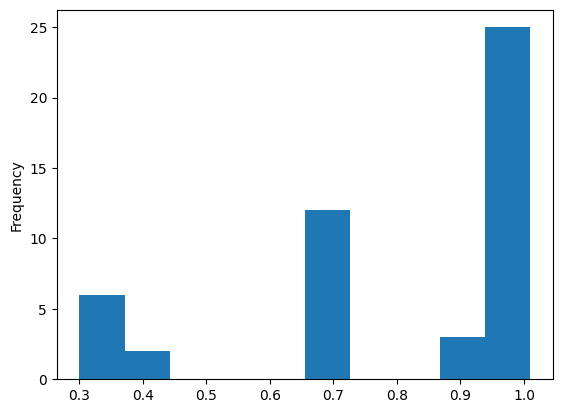

In [10]:
df_2.loc[df_2['cut'] == 'Good'].loc[df_2['color'] == 'E'].loc[df_2['clarity'] == 'VS2']['carat'].plot.hist()

In [11]:
def classificatoration(df, col1, col2, target, values, scale=1):
    df_corr = pd.DataFrame(columns=[target, 'label'])
    n = 0
    values.sort()
    
    if scale == 2:
        scaler = StandardScaler()
    elif scale ==3:
        scaler = RobustScaler()
    else:
        scaler = MinMaxScaler()
    
    
    for car in carats:
        for x in df.loc[df['carat'] == car][col1].unique():
            for y in df.loc[df['carat'] == car].loc[df[col1] == x][col2].unique():
                items = list(df_2.loc[df_2['carat'] == car].loc[df_2[col1] == x].loc[df_2[col2] == y][target].unique())
                items.sort()
                if items == values:
                    temp_df = df_2.loc[df_2['carat'] == car].loc[df_2[col1] == x].loc[df_2[col2] == y]
                    agg_df = temp_df.groupby([col1, col2, target]).sum(numeric_only=True).reset_index()
                    agg_df['pxc'] = agg_df['price']/agg_df['carat']
                

                    agg_df['label'] = scaler.fit_transform(agg_df[['pxc']])
                
                    df_corr = pd.concat([df_corr, agg_df[[target, 'label']]], axis=0)
                    n += 1
    
    print(f'Results based in {n} combinations. Scaler: {scaler}.')     
    
    return df_corr.groupby(target).mean(numeric_only=True).sort_values('label', ascending=False).reset_index()
                

In [12]:
clar_lab_mm = classificatoration(df_2, 'cut', 'color', 'clarity', clarities, scale=1)
clar_lab_std = classificatoration(df_2, 'cut', 'color', 'clarity', clarities, scale=2)
clar_lab_rob = classificatoration(df_2, 'cut', 'color', 'clarity', clarities, scale=3)

Results based in 14 combinations. Scaler: MinMaxScaler().
Results based in 14 combinations. Scaler: StandardScaler().
Results based in 14 combinations. Scaler: RobustScaler().


In [13]:
clar_lab_mm.to_csv('../data/scales/clar_lab_mm.csv')
clar_lab_std.to_csv('../data/scales/clar_lab_std.csv')
clar_lab_rob.to_csv('../data/scales/clar_lab_rob.csv')

In [14]:
cut_lab_mm = classificatoration(df_2, 'color', 'clarity', 'cut', cuts, scale=1)
cut_lab_std = classificatoration(df_2, 'color', 'clarity', 'cut', cuts, scale=2)
cut_lab_rob = classificatoration(df_2, 'color', 'clarity', 'cut', cuts, scale=3)

Results based in 134 combinations. Scaler: MinMaxScaler().
Results based in 134 combinations. Scaler: StandardScaler().
Results based in 134 combinations. Scaler: RobustScaler().


In [15]:
cut_lab_mm.to_csv('../data/scales/cut_lab_mm.csv')
cut_lab_std.to_csv('../data/scales/cut_lab_std.csv')
cut_lab_rob.to_csv('../data/scales/cut_lab_rob.csv')

In [16]:
col_lab_mm = classificatoration(df_2, 'cut', 'clarity', 'color', colors, scale=1)
col_lab_std = classificatoration(df_2, 'cut', 'clarity', 'color', colors, scale=2)
col_lab_rob = classificatoration(df_2, 'cut', 'clarity', 'color', colors, scale=3)

Results based in 116 combinations. Scaler: MinMaxScaler().
Results based in 116 combinations. Scaler: StandardScaler().
Results based in 116 combinations. Scaler: RobustScaler().


In [17]:
col_lab_mm.to_csv('../data/scales/col_lab_mm.csv')
col_lab_std.to_csv('../data/scales/col_lab_std.csv')
col_lab_rob.to_csv('../data/scales/col_lab_rob.csv')

In [16]:
col_lab_rob

,color,label
0,D,0.897684
1,E,0.573939
2,F,0.321249
3,G,-0.003223
4,H,-0.313541
5,I,-0.784898
6,J,-1.347701


In [14]:
def classify_diamond_shape(x, y, z, table, depth):
    # Calculate ratios
    length_to_width_ratio = x / y
    length_to_depth_ratio = x / z

    # Define shape classification ranges
    shape_ranges = {
        'Round Brilliant': {
            'length_to_width_ratio': (0.95, 1.05),
            'length_to_depth_ratio': (1.35, 1.65),
            'table_percentage': (52, 62),
            'depth_percentage': (59, 63)
        },
        'Princess': {
            'length_to_width_ratio': (0.90, 1.10),
            'length_to_depth_ratio': (0.90, 1.10),
            'table_percentage': (60, 80),
            'depth_percentage': (58, 77)
        },
        'Emerald': {
            'length_to_width_ratio': (1.20, 1.60),
            'length_to_depth_ratio': (1.30, 1.60),
            'table_percentage': (60, 69),
            'depth_percentage': (60, 75)
        },
        'Asscher': {
            'length_to_width_ratio': (1.00, 1.05),
            'length_to_depth_ratio': (1.00, 1.05),
            'table_percentage': (60, 68),
            'depth_percentage': (60, 75)
        },
        'Radiant': {
            'length_to_width_ratio': (1.00, 1.30),
            'length_to_depth_ratio': (1.00, 1.30),
            'table_percentage': (60, 69),
            'depth_percentage': (60, 75)
        },
        'Pear': {
            'length_to_width_ratio': (1.40, 2.00),
            'length_to_depth_ratio': (1.30, 1.70),
            'table_percentage': (53, 63),
            'depth_percentage': (58, 66)
        },
        'Marquise': {
            'length_to_width_ratio': (1.60, 2.10),
            'length_to_depth_ratio': (1.30, 2.20),
            'table_percentage': (53, 63),
            'depth_percentage': (58, 66)
        },
        'Oval': {
            'length_to_width_ratio': (1.20, 1.70),
            'length_to_depth_ratio': (1.30, 1.70),
            'table_percentage': (53, 63),
            'depth_percentage': (58, 66)
        },
        'Heart': {
            'length_to_width_ratio': (0.90, 1.10),
            'length_to_depth_ratio': (0.90, 1.10),
            'table_percentage': (53, 63),
            'depth_percentage': (58, 66)
        },
        'Cushion': {
            'length_to_width_ratio': (1.00, 1.10),
            'length_to_depth_ratio': (1.00, 1.10),
            'table_percentage': (53, 63),
            'depth_percentage': (58, 66)
        }
    }

    # Classify the diamond shape
    for shape, ranges in shape_ranges.items():
        if (ranges['length_to_width_ratio'][0] <= length_to_width_ratio <= ranges['length_to_width_ratio'][1] and
                ranges['length_to_depth_ratio'][0] <= length_to_depth_ratio <= ranges['length_to_depth_ratio'][1] and
                ranges['table_percentage'][0] <= table <= ranges['table_percentage'][1] and
                ranges['depth_percentage'][0] <= depth <= ranges['depth_percentage'][1]):
            return shape

    return 'Unknown'  # If no shape match is found

# Example usage
x = 6.1
y = 6.1
z = 3.7
table = 58
depth = 61

diamond_shape = classify_diamond_shape(x, y, z, table, depth)
print("The diamond shape is:", diamond_shape)

The diamond shape is: Round Brilliant


In [15]:
shapes = []

for i in range(len(df)):
    x = df['x'].iloc[i]
    y = df['y'].iloc[i]
    z = df['z'].iloc[i]
    t = df['table'].iloc[i]
    d = df['depth'].iloc[i]

    shapes.append(classify_diamond_shape(x, y, z, t, d))
    
shapes

C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\2512044170.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  length_to_depth_ratio = x / z
C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\2512044170.py:3: RuntimeWarning: invalid value encountered in scalar divide
  length_to_width_ratio = x / y
C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\2512044170.py:4: RuntimeWarning: invalid value encountered in scalar divide
  length_to_depth_ratio = x / z


['Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Unknown',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brillian

In [32]:
xy, xz = df['x'][4] / df['y'][4], df['x'][4] / df['z'][4]

In [18]:
df['xy'] = df['x']/df['y']

In [38]:
df['xz'] = df['x']/df['z']

In [33]:
xy, xz

(1.0061443932411673, 1.6582278481012658)

In [35]:
df['xy'].max()

1.6155717761557176

In [52]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,city,price,xy,xz
1368,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,New York City,3837,1.004637,inf
3676,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,Madrid,18207,1.008805,inf
7937,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,Madrid,2130,NaN,NaN
13602,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,Kimberly,18788,1.005650,inf
14736,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,Kimberly,4954,0.000000,NaN
14803,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,Surat,12631,1.004734,inf
16414,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,Surat,17265,1.005974,inf
19659,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,Madrid,3142,1.010802,inf
21441,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,New York City,5564,1.007321,inf
24761,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,Dubai,3696,1.004637,inf


In [43]:
df['y'].min()

0.0

In [44]:
df['z'].min()

0.0

In [36]:
df['xy'].min()

0.0

In [41]:
df['xz'].max()

inf

In [19]:
df['table'][2]

55.0

In [20]:
df['depth'][2]

65.5

In [23]:
def classify_diamond_shape_2(x, y, z):
    # Calculate ratios
    length_to_width_ratio = x / y
    length_to_depth_ratio = x / z

    # Define shape classification ranges
    shape_ranges = {
        'Round Brilliant': {
            'length_to_width_ratio': (0.95, 1.05),
            'length_to_depth_ratio': (1.35, 1.65)
        },
        'Princess': {
            'length_to_width_ratio': (0.90, 1.10),
            'length_to_depth_ratio': (0.90, 1.10)
        },
        'Emerald': {
            'length_to_width_ratio': (1.20, 1.60),
            'length_to_depth_ratio': (1.30, 1.60)
        },
        'Radiant': {
            'length_to_width_ratio': (1.00, 1.30),
            'length_to_depth_ratio': (1.00, 1.30)
        },
        'Pear': {
            'length_to_width_ratio': (1.40, 2.00),
            'length_to_depth_ratio': (1.30, 1.70)
        },
        'Marquise': {
            'length_to_width_ratio': (1.60, 2.10),
            'length_to_depth_ratio': (1.30, 2.20)
        },
        'Oval': {
            'length_to_width_ratio': (1.20, 1.70),
            'length_to_depth_ratio': (1.30, 1.70)
        },
        'Cushion': {
            'length_to_width_ratio': (1.00, 1.10),
            'length_to_depth_ratio': (1.00, 1.10)
        }
    }

    # Classify the diamond shape
    for shape, ranges in shape_ranges.items():
        if (ranges['length_to_width_ratio'][0] <= length_to_width_ratio <= ranges['length_to_width_ratio'][1]
                and ranges['length_to_depth_ratio'][0] <= length_to_depth_ratio <= ranges['length_to_depth_ratio'][1]):
            return shape

    return 'Unknown'  # If no shape match is found

# Example usage
x = 6.1
y = 6.1
z = 3.7

diamond_shape = classify_diamond_shape_2(x, y, z)
print("The diamond shape is:", diamond_shape)


The diamond shape is: Round Brilliant


In [24]:
shapes = []

for i in range(len(df)):
    x = df['x'].iloc[i]
    y = df['y'].iloc[i]
    z = df['z'].iloc[i]


    shapes.append(classify_diamond_shape_2(x, y, z))
    
shapes

C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\932641607.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  length_to_depth_ratio = x / z
C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\932641607.py:3: RuntimeWarning: invalid value encountered in scalar divide
  length_to_width_ratio = x / y
C:\Users\magno.MAUDITORS\AppData\Local\Temp\ipykernel_8144\932641607.py:4: RuntimeWarning: invalid value encountered in scalar divide
  length_to_depth_ratio = x / z


['Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Unknown',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Brilliant',
 'Round Bril

In [26]:
xxx = pd.DataFrame(shapes, columns=['shape'])

In [31]:
xxx[xxx['shape']=='Unknown']

,shape
4,Unknown
10,Unknown
12,Unknown
14,Unknown
18,Unknown
...,...
40430,Unknown
40435,Unknown
40440,Unknown
40445,Unknown


In [34]:
xxx['shape'].max()

'Unknown'